# Life Expectancy (WHO)
Statistical Analysis on factors influencing Life Expectancy

METRO COLLEGE OF TECHNOLOGY

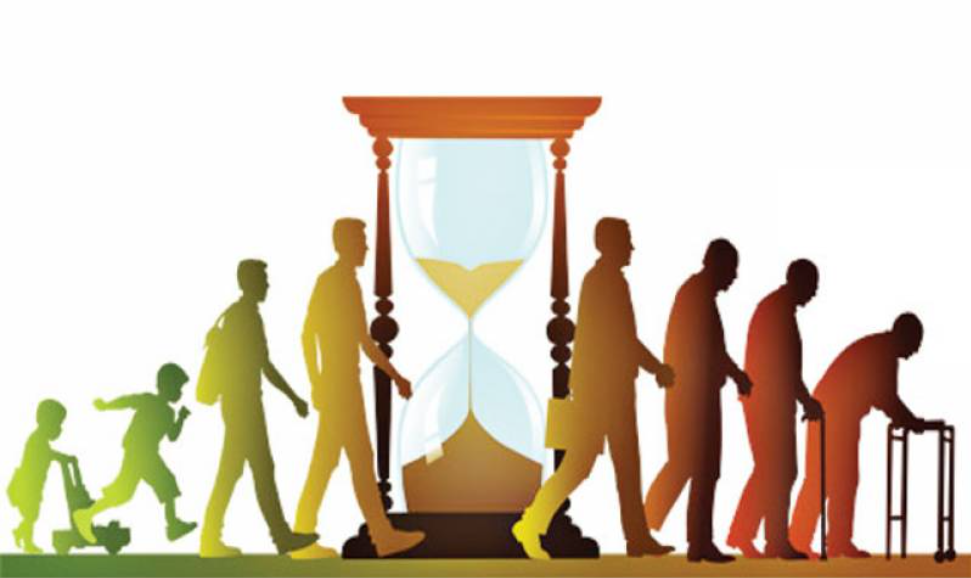

In [24]:
# import the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [25]:
# import the data
df = pd.read_csv('data/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
# Extract Column Names of a Pandas Dataframe
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
df.info() # Checking the data type of attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [28]:
df.shape # Checking the number of rows and columns. row numbers=2938 and 22 columns

(2938, 22)

# Descriptive summary of Data

In [29]:
df.describe().T # Checking the summary statistics of continuous variables

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [30]:
#Fixing column names
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

# Checking Missing Values

In [31]:
df.isnull().values.any()

True

In [32]:
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

display(find_missing_data(df))

,Total,Percent
Population,652,0.221920
HepatitisB,553,0.188223
GDP,448,0.152485
Total_expenditure,226,0.076923
Alcohol,194,0.066031
Income_composition_of_resources,167,0.056841
Schooling,163,0.055480
BMI,34,0.011572
Thinness_1-19_years,34,0.011572
Thinness_5-9_years,34,0.011572


In [33]:
#Replacing missing values with mean
def imputer_mean(feature,data=df):
    data[feature].fillna(data[feature].mean(),inplace=True)
    
features_miss=df.columns[df.isna().any()]
for feature in features_miss:
    imputer_mean(feature=feature)

In [34]:
df.isnull().values.any() # no missing values

False

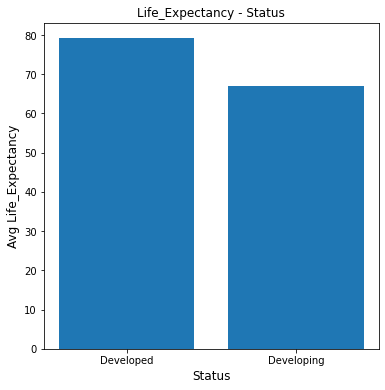

In [35]:
#target variable distribution over status
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy - Status")
plt.show()

# Subplots showing Distribution of Independent variables with Target

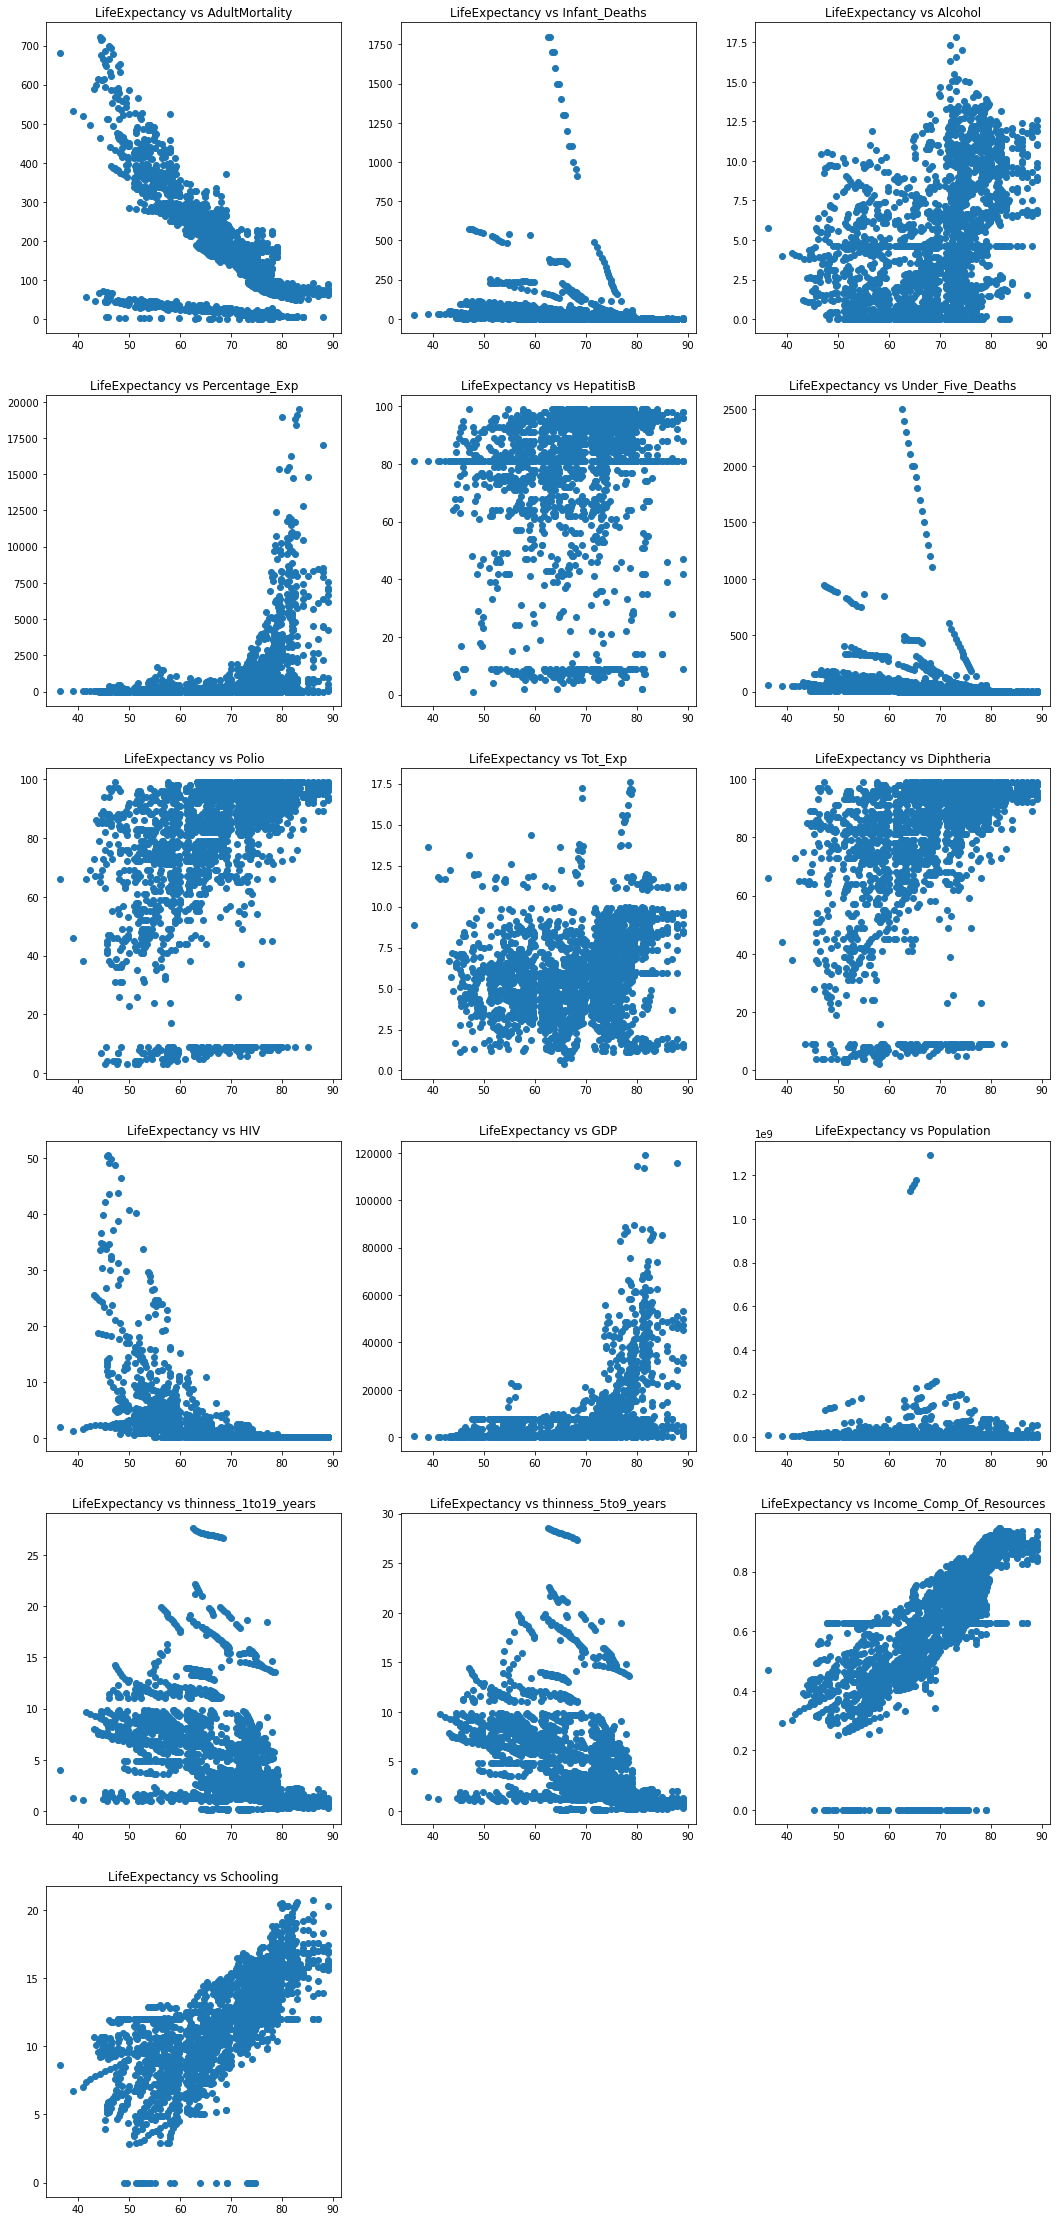

In [36]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["Life_expectancy"], df["Adult_mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["Life_expectancy"], df["Infant_deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["Life_expectancy"], df["Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["Life_expectancy"], df["Percentage_expenditure"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["Life_expectancy"], df["HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["Life_expectancy"], df["Under_five_deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["Life_expectancy"], df["Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["Life_expectancy"], df["Total_expenditure"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["Life_expectancy"], df["Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["Life_expectancy"], df["HIV/AIDS"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["Life_expectancy"], df["GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["Life_expectancy"], df["Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df["Life_expectancy"], df["Thinness_1-19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df["Life_expectancy"], df["Thinness_5-9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df["Life_expectancy"], df["Income_composition_of_resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df["Life_expectancy"], df["Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

In [37]:
#shuffle the dataset for proper sampling
df.sample(frac = 1, random_state=1)

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
1268,Israel,2013,Developing,82.1,61.0,1,2.69,4279.895512,97.000000,50,...,96.0,7.89,96.0,0.1,36393.669320,8.595000e+03,1.2,1.1,0.891000,15.900000
2719,Uganda,2010,Developing,58.4,362.0,79,10.03,116.202964,8.000000,1313,...,79.0,11.20,8.0,8.0,594.997256,3.391513e+07,6.0,6.0,0.473000,10.900000
2710,Turkmenistan,2002,Developing,63.3,229.0,7,2.33,130.378483,96.000000,11,...,99.0,3.34,98.0,0.1,967.917468,4.612000e+03,3.5,3.5,0.000000,10.200000
2028,Philippines,2010,Developing,67.9,218.0,58,4.85,198.256379,77.000000,6368,...,78.0,4.37,79.0,0.1,2129.499242,9.372662e+07,1.0,9.7,0.662000,11.400000
351,Botswana,2000,Developing,47.8,647.0,2,5.37,250.891648,86.000000,2672,...,97.0,4.64,97.0,38.8,3349.688230,1.728340e+05,12.3,12.2,0.559000,11.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,United Kingdom of Great Britain and Northern I...,2014,Developed,81.0,71.0,3,10.37,0.000000,80.940461,133,...,95.0,9.12,95.0,0.1,7483.158469,1.275338e+07,0.8,0.5,0.627551,11.992793
905,Fiji,2008,Developing,68.7,26.0,0,1.95,81.046561,99.000000,0,...,99.0,3.68,99.0,0.1,4177.657789,8.433400e+04,4.0,3.7,0.700000,14.300000
1096,Guinea-Bissau,2009,Developing,56.3,288.0,4,2.55,47.129693,8.000000,0,...,78.0,6.81,8.0,6.0,544.222779,1.517448e+06,8.3,8.1,0.401000,8.900000
235,Belarus,2004,Developing,68.2,247.0,1,12.05,42.334439,99.000000,2,...,99.0,6.59,99.0,0.1,2378.339270,9.731460e+05,2.4,2.5,0.703000,14.100000


# Checking Co-relation

In [38]:
# We next observe and measure the correlation between each features.
#Correlation Matrix-checking the linear association between the independent variables
#-1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables
corr = df.corr()
corr

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life_expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult_mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
Infant_deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
Percentage_expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
HepatitisB,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
Under_five_deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


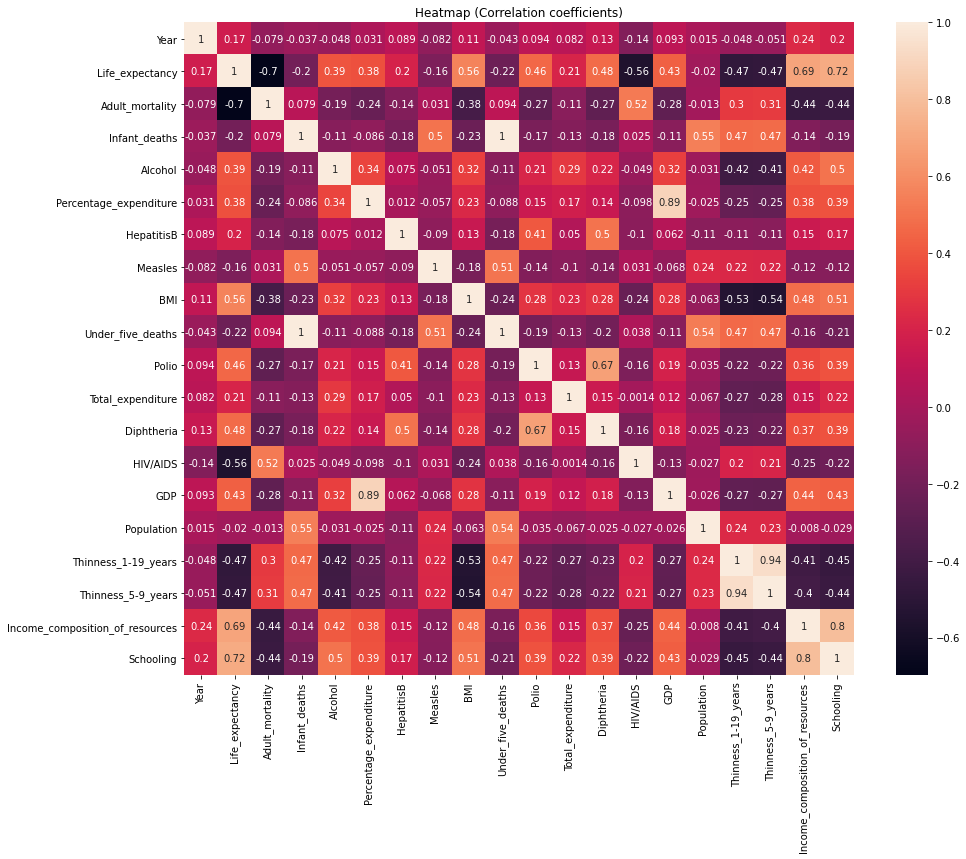

In [39]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr, annot = True, color = 'yellow')
plt.title('Heatmap (Correlation coefficients)')
plt.show()

In [40]:
#Checking Highly Correlated Features
correlated_features = set()
for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.5:
            colname = corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'Schooling', 'GDP', 'Under_five_deaths', 'Diphtheria', 'BMI', 'Thinness_5-9_years', 'Adult_mortality', 'Population', 'Measles', 'HIV/AIDS', 'Income_composition_of_resources', 'Thinness_1-19_years'}


# Encoding

In [41]:
data=pd.get_dummies(df,columns=['Status'])
data.head()

,Country,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


# Extracting Dependent and Independent variables

In [42]:
X = data.drop(['Life_expectancy', 'Year','Country'], axis=1)
X1 = data.drop(['Life_expectancy', 'Year','Country','Population','Percentage_expenditure','Total_expenditure','Thinness_1-19_years','Thinness_5-9_years'], axis=1)
y = data.Life_expectancy
X.head()

,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


# Checking p-values of independent variables(X)

In [43]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X1) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     942.9
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        18:37:10   Log-Likelihood:                -8276.4
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2923   BIC:                         1.667e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# PCA
Trying to fix the Multicollinearity issue

In [45]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
#pca.fit(X2)
pca = PCA(n_components=10,whiten=True)
pca = pca.fit(X1)
dataPCA = pca.transform(X1)

In [ ]:
Running Ols Model to check the Multicollinearity issue

In [46]:
import statsmodels.api as sm
X2 = sm.add_constant(dataPCA) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     782.6
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        18:38:09   Log-Likelihood:                -8873.5
No. Observations:                2938   AIC:                         1.777e+04
Df Residuals:                    2927   BIC:                         1.783e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.2249      0.092    755.139      0.0

# Linear Regression

In [318]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.7873054744714919

In [319]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train_L, X_test_L,y_train_L,y_test_L = train_test_split(X,y,random_state=0,test_size=0.2)
#20% of data for test and 80% for train data

In [320]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
L_model = LinearRegression()

In [321]:
#Fit Train data to train the model
L_model.fit(X_train_L,y_train_L)

LinearRegression()

In [322]:
#Test accuracy
L_model.score(X_test_L,y_test_L) #accuracy .82

0.8208489521030368

In [323]:
#predict y values
y_pred_L = L_model.predict(X_test_L)

In [324]:
from sklearn.metrics import r2_score,mean_squared_error
import math

print('r² value : ',r2_score(y_test_L,y_pred_L)) #r^2
print('Mean squared error (MSE) : ',mean_squared_error(y_test_L,y_pred_L)) #MSE-how close a regression line is to  a set of points.
print('Root Mean Square Error (RMSE): ',math.sqrt(mean_squared_error(y_test_L,y_pred_L))) # RMSE

r² value :  0.8208489521030368
Mean squared error (MSE) :  16.31016956995316
Root Mean Square Error (RMSE):  4.038585095049151


In [325]:
#dimensions of data
n=len(X_test_L)
n

588

In [326]:
k=len(X_test_L.iloc[0])
k

20

In [327]:
#checking R2 score y test and y pred
R2=r2_score(y_test_L,y_pred_L)
R2

0.8208489521030368

In [328]:
Adj_R2=1-((n-1)*(1-R2)/(n-k-1))
print(Adj_R2)

0.8145296911542903


In [329]:
L_model.intercept_ #b0

55.76300078450575

In [202]:
L_model.coef_ #b1

array([-1.97937154e-02,  1.00958607e-01,  6.31850350e-02,  8.13590200e-05,
       -1.58972337e-02, -2.10843995e-05,  4.85917050e-02, -7.60086940e-02,
        3.10107609e-02,  1.14588272e-01,  3.91563316e-02, -4.54597030e-01,
        3.56986297e-05,  1.38461301e-09, -1.03679458e-01,  3.84630266e-02,
        5.99232958e+00,  5.90238692e-01,  7.96531166e-01, -7.96531166e-01])

In [330]:
#r^2 coefficient of determination

L_model.score(X_train_L,y_train_L)  #Training score

0.8186384673433018

In [331]:
L_model.score(X_test_L,y_test_L) #Test score

0.8208489521030368

# KNN Regressor
approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

In [332]:
#shuffle the data
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=0)

In [333]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_k = pd.DataFrame(sc.fit_transform(X))
y_k = pd.Series(y)

In [334]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_k,y_k,cv=5).mean()

0.9090015575076992

In [335]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train_K, X_test_K,y_train_K,y_test_K = train_test_split(X_k,y_k,random_state=0,test_size=0.2)
#20% of data for test and 80% for train data

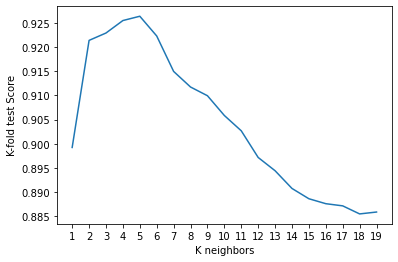

Maximum KNN Score is 92.64%


In [336]:
# try to find best k value
score = []

for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train_K, y_train_K.values.ravel())
    score.append(knn.score(X_test_K, y_test_K.values.ravel()))
    
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K neighbors")
plt.ylabel("K-fold test Score")
plt.show()

acc = max(score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [210]:
knn = KNeighborsRegressor() 
knn.fit(X_train_K,y_train_K)
knn.score(X_test_K, y_test_K)  

0.9263609803371798

In [337]:
#see the cross_validated score for cv=5
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_k,y_k,cv=5).mean()

0.8749839893657045

In [338]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_K,y_train_K)
model_knn.score(X_test_K,y_test_K)

0.9263609803371798

In [339]:
y_pred_k = model_knn.predict(X_test_K)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(f'R2 Score: {r2_score(y_test_K,y_pred_k)}')
print(f'Mean Squared Error, MSE: {mean_squared_error(y_test_K,y_pred_k)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test_K,y_pred_k))}')

R2 Score: 0.9263609803371798
Mean Squared Error, MSE: 6.686089794999825
RMSE: 2.5857474344954547


In [340]:
nk = len(X_test_K)
kk = len(X_test_K.iloc[0])
R2k = r2_score(y_test_K,y_pred_k)
R2k

0.9263609803371798

In [341]:
adj_R2k = 1-((nk-1)*(1-R2k)/(nk-kk-1))
print(f'The adjusted R2: {adj_R2k}')

The adjusted R2: 0.923763484052777


In [342]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_K, y_train_K)  #fit the model
    pred=model.predict(X_test_K) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_K,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.0244659029196397
RMSE value for k=  2 is: 2.671885506543833
RMSE value for k=  3 is: 2.64588854699766
RMSE value for k=  4 is: 2.601292034742013
RMSE value for k=  5 is: 2.5857474344954547
RMSE value for k=  6 is: 2.6563752141987433
RMSE value for k=  7 is: 2.778672596737148
RMSE value for k=  8 is: 2.8308170211273747
RMSE value for k=  9 is: 2.8595096640949373
RMSE value for k=  10 is: 2.9236469854943197
RMSE value for k=  11 is: 2.9723443113498167
RMSE value for k=  12 is: 3.0553128970820396
RMSE value for k=  13 is: 3.0957639976198505
RMSE value for k=  14 is: 3.149019058996934
RMSE value for k=  15 is: 3.17951409789382
RMSE value for k=  16 is: 3.194059133589437
RMSE value for k=  17 is: 3.200426913360725
RMSE value for k=  18 is: 3.2239477637351017
RMSE value for k=  19 is: 3.2184649449892317
RMSE value for k=  20 is: 3.2313051502336982


<AxesSubplot:>

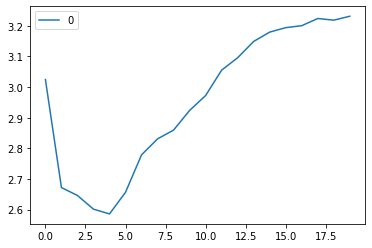

In [343]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [344]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_K,y_train_K)
model.best_params_


{'n_neighbors': 4}

# Random Forest Regressor
meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [345]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [346]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_R = pd.DataFrame(sc.fit_transform(X))
y_R = pd.Series(y)

In [347]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9),
                                  X_R,y_R,cv=4).mean())

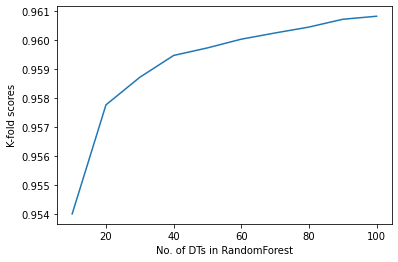

In [348]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

# Hyper-parameter tuning using Grid Search

In [349]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [13,14,15]
        }
rf_model = GridSearchCV(RandomForestRegressor(), params,cv=4)
rf_model.fit(X_R,y_R)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})

In [350]:
rf_model.best_params_

{'max_depth': 14, 'n_estimators': 120}

In [351]:
rf_model.best_score_

0.9612367820938558

In [352]:
rf_best_model = rf_model.best_estimator_

In [353]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train_R, X_test_R,y_train_R,y_test_R = train_test_split(X_R,y_R,random_state=0,test_size=0.2)
#20% of data for test and 80% for train data

In [354]:
rf_best_model.fit(X_train_R,y_train_R)

RandomForestRegressor(max_depth=14, n_estimators=120)

In [355]:
rf_best_model.score(X_test_R,y_test_R) #test score

0.9691318196507626

In [356]:
rf_best_model.score(X_train_R,y_train_R) #train score

0.9938638338079313

In [357]:
cross_val_score(RandomForestRegressor(n_estimators=110,max_depth=14),X_R,y_R,cv=4)

array([0.95959874, 0.96214628, 0.96216636, 0.96117938])

In [358]:
y_pred_R = rf_best_model.predict(X_test_R)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(f'R2 Score: {r2_score(y_test_R,y_pred_R)}')
print(f'Mean Squared Error, MSE: {mean_squared_error(y_test_R,y_pred_R)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test_R,y_pred_R))}')

R2 Score: 0.9691318196507626
Mean Squared Error, MSE: 2.802691108168761
RMSE: 1.6741239823169491


In [359]:
nR = len(X_test_R)
kR = len(X_test_R.iloc[0])
R2R = r2_score(y_test_R,y_pred_R)
R2R

0.9691318196507626

In [360]:
adj_R2R = 1-((nR-1)*(1-R2R)/(nR-kR-1))
print(f'The adjusted R2: {adj_R2R}')

The adjusted R2: 0.9680429949470858


# AdaBoost Regression Model
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [361]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
adaR = AdaBoostRegressor()

In [362]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_AdaR = pd.DataFrame(sc.fit_transform(X))
y_AdaR = pd.Series(y)

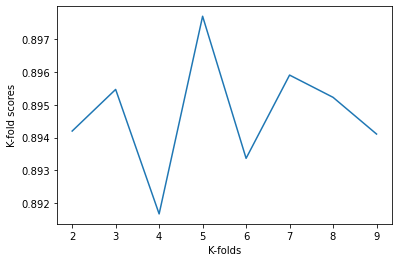

In [253]:
#Graph K fold score

ada_scores = []
for i in range(2,10):
    ada_scores.append(cross_val_score(AdaBoostRegressor(),X_AdaR,y_AdaR,cv=i).mean())
    
plt.plot(range(2,10),ada_scores)
plt.xlabel('K-folds')
plt.ylabel('K-fold scores')
plt.show()

In [261]:
#Graph k-fold score vs no. of estimators in AdaBoost Regressor
ascores = []
for i in range(10,101,10):
    ascores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=9),
                                  X_AdaR,y_AdaR,cv=5).mean())

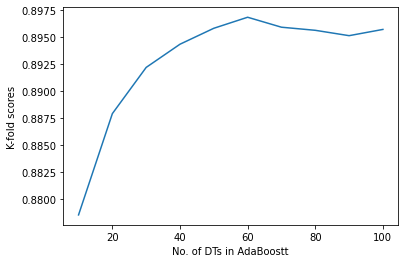

In [262]:
plt.plot(range(10,101,10),ascores)
plt.xlabel('No. of DTs in AdaBoostt')
plt.ylabel('K-fold scores')
plt.show()

# Hyper-parameter tuning using Grid Search

In [265]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings
params = {
          'n_estimators':[70,80,90,100],
          'base_estimator':[DecisionTreeRegressor(max_depth=9,random_state=0),
                            DecisionTreeRegressor(max_depth=10,random_state=0),
                            DecisionTreeRegressor(max_depth=11,random_state=0)
                           ]
         }
model_ada = GridSearchCV(AdaBoostRegressor(random_state=0), params, cv=5)
model_ada.fit(X_AdaR,y_AdaR)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=9,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=10,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=11,
                                                                  random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [266]:
model_ada.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=11, random_state=0),
 'n_estimators': 100}

In [267]:
model_ada.best_score_

0.9643614728876422

In [268]:
best_model_ada = model_ada.best_estimator_

In [269]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train_A, X_test_A,y_train_A,y_test_A = train_test_split(X_AdaR,y_AdaR,random_state=0,test_size=0.2)
#20% of data for test and 80% for train data

In [271]:
best_model_ada.fit(X_train_A,y_train_A)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=11,
                                                       random_state=0),
                  n_estimators=100, random_state=0)

In [272]:
best_model_ada.score(X_test_A,y_test_A) #test score

0.9681748511249334

In [273]:
best_model_ada.score(X_train_A,y_train_A) #train score

0.998481513507419

In [276]:
y_pred_Ad = best_model_ada.predict(X_test_A)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(f'R2 Score: {r2_score(y_test_A,y_pred_Ad)}')
print(f'Mean Squared Error, MSE: {mean_squared_error(y_test_A,y_pred_Ad)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test_A,y_pred_Ad))}')

R2 Score: 0.9681748511249334
Mean Squared Error, MSE: 2.8895795203716874
RMSE: 1.699876325022408


In [277]:
nA = len(X_test_A)
kA = len(X_test_A.iloc[0])
R2A = r2_score(y_test_A,y_pred_Ad)
R2A

0.9681748511249334

In [278]:
adj_R2A = 1-((nA-1)*(1-R2A)/(nA-kA-1))
print(f'The adjusted R2: {adj_R2A}')

The adjusted R2: 0.9670522709177


# SVR Regression Model
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples. 

In [282]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
svR = SVR()

In [283]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_svR = pd.DataFrame(sc.fit_transform(X))
y_svR = pd.Series(y)

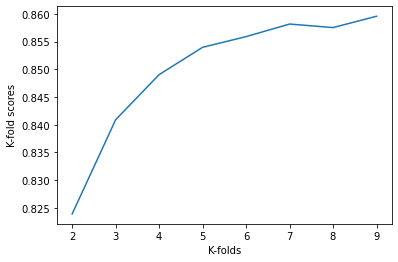

In [284]:
#Graph k-fold score for SVR

scores_sv = []
for i in range(2,10):
    scores_sv.append(cross_val_score(SVR(),X_svR,y_svR,cv=i).mean())
    
plt.plot(range(2,10),scores_sv)
plt.xlabel('K-folds')
plt.ylabel('K-fold scores')
plt.show()

In [286]:
#split the data into training and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train_S, X_test_S,y_train_S,y_test_S = train_test_split(X_svR,y_svR,random_state=0,test_size=0.2)
#20% of data for test and 80% for train data

# Hyper-parameter tuning using Grid Search

In [288]:
params = {
          'kernel':('linear', 'rbf'),
          'C':[1,1.5,2]
         }
model_svr = GridSearchCV(SVR(gamma='scale',verbose=True),params,cv=9)
model_svr.fit(X_train_S,y_train_S)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=9, estimator=SVR(verbose=True),
             param_grid={'C': [1, 1.5, 2], 'kernel': ('linear', 'rbf')})

In [289]:
model_svr.best_params_

{'C': 2, 'kernel': 'rbf'}

In [290]:
model_svr.best_score_

0.8789553338458813

In [291]:
best_model_svr = model_svr.best_estimator_

In [292]:
best_model_svr.fit(X_train_S,y_train_S)

[LibSVM]

SVR(C=2, verbose=True)

In [294]:
best_model_svr.score(X_train_S,y_train_S)

0.9005218573736153

In [293]:
best_model_svr.score(X_test_S,y_test_S)

0.9005046859502029

In [295]:
y_pred_svr = best_model_svr.predict(X_test_S)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(f'R2 Score: {r2_score(y_test_S,y_pred_svr)}')
print(f'Mean Squared Error, MSE: {mean_squared_error(y_test_S,y_pred_svr)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test_S,y_pred_svr))}')

R2 Score: 0.9005046859502029
Mean Squared Error, MSE: 9.033724334797505
RMSE: 3.0056154668881887


In [296]:
nSV = len(X_test_S)
kSV = len(X_test_S.iloc[0])
R2SV = r2_score(y_test_S,y_pred_svr)
R2SV

0.9005046859502029

In [297]:
adj_R2SV = 1-((nSV-1)*(1-R2SV)/(nSV-kSV-1))
print(f'The adjusted R2: {adj_R2SV}')

The adjusted R2: 0.8969951510630849


# Summary & Conclusion

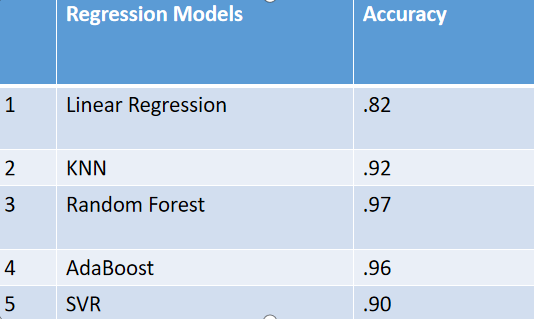

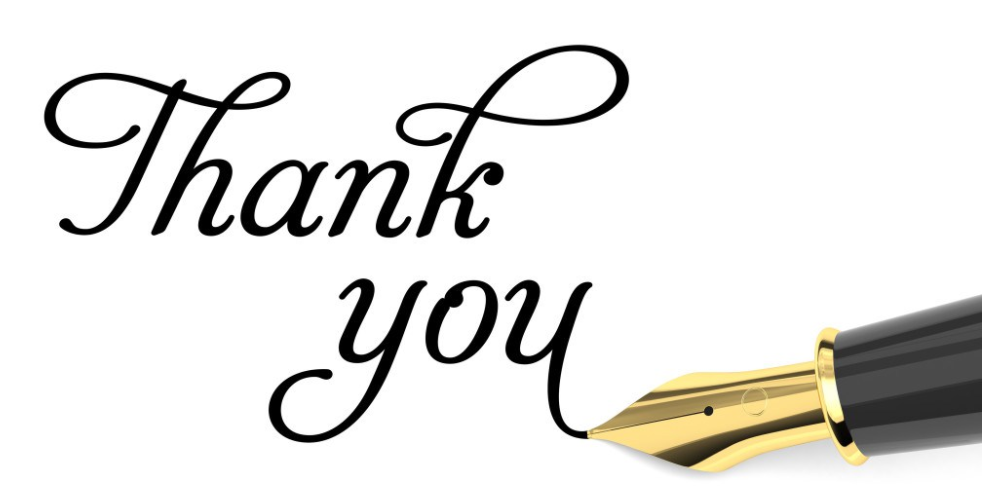